In [1]:
# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [2]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
#print data.describe()
print '\n'
print "Dataset has {} rows, {} columns".format(*data.shape)
print '\n'
print data.head()  # print the first 5 rows
print '\n'



Dataset has 440 rows, 6 columns


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185




**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

1) List one or two ideas for what might show up as the first PCA dimensions:

PCA, as the name implies, will create "components" that best captures the variance in the data.  PCA reduces the number of features, or dimensionality, while minimizing information loss.  What we know about the data so far, from the assignment description and the README file, is that the wholesale distribution company caters to both high-volume customers and smaller family-run businesses.  The README file gives a high-level overview of the data:

**Attribute: 		(Min, 	Max, 		Mean, 		Std. Deviation)**
- Fresh: 			(3,		112,151, 	12,000.30, 	12,47.329)
- Grocery: 			(3, 	92,780, 	7,951.28, 	9,503.163)
- Milk: 			(55, 	73,498, 	5,796.27, 	7,380.377)
- Frozen: 			(25, 	60,869, 	3,071.93, 	4,854.673)
- Detergents_Paper: (3, 	40,827, 	2,881.49, 	4,767.854)
- Delicatessen: 	(3, 	47,943, 	1,524.87, 	2,820.106)

Given the initial information about the types of clients, high-volume customers and smaller family-run shops, and the high-level summary of the data in the README file, I sense that the first PCA dimension (which captures the most variance in the data) will relate to the "Fresh" and "Grocery" items.  Both of these items have the greatest standard deviations. 

2) What type of vectors will show up as ICA dimensions:

ICA, on the other hand, looks to find components that are statistically independent from each other.  ICA will attempt to find clear boundaries between components.  I have the sense that the ICA method is not appropriate for this data as there will be no clear division, no real independence between wholesale items.  But let's find out.  If ICA proves useful however, each of the ICA vectors could represent independent customers.


In [3]:
print 'Additional information learned after Udacity feedback...'
print 'The data.describe() function provides information on the data...'
print '\n'
print data.describe()

Additional information learned after Udacity feedback...
The data.describe() function provides information on the data...


               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
7



data.head()...
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


pca.components_...
[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]


pca.explained_variance_ratio_...
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]




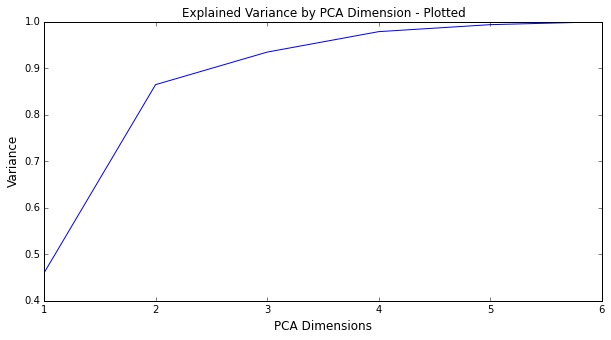

In [4]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# for viewing
print '\n'
print 'data.head()...'
print data.head()  # print the first 5 rows
print '\n'

# Print the components and the amount of variance in the data contained in each dimension
print 'pca.components_...'
print pca.components_
print '\n'
print 'pca.explained_variance_ratio_...'
print pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.xlabel('PCA Dimensions', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Explained Variance by PCA Dimension - Plotted')
X = np.arange(1,7)
Y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(X,Y)
print '\n'

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer:
The variance drops off significantly after the 2nd primary component.  Looking at the results of the plotted PCA graph, I would choose the first two dimensions.  The first two dimensions capture 86% of the variance in the data.

**3)** What do the dimensions seem to represent? How can you use this information?



The graph below shows, among other things, how high-volume customers order much more "Fresh" items (in comparison to other items) than low-volume customers.


(-0.25, 1)

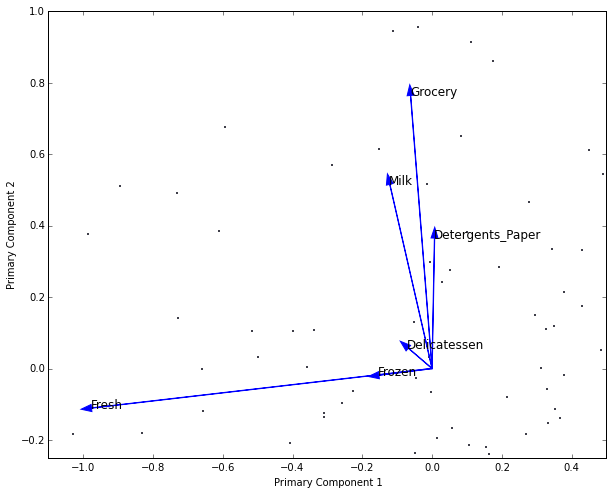

In [6]:
print '\n'
print 'The graph below shows, among other things, how high-volume customers order much more "Fresh" items (in comparison to other items) than low-volume customers.'

#import pandas as pd
from sklearn.decomposition import PCA

def biplot(df):
    # Fit on 2 components
    pca = PCA(n_components = 2, whiten=True).fit(df)
    
    # Plot transformed/projected data
    ax = pd.DataFrame(
        pca.transform(df),
        columns=['Primary Component 1', 'Primary Component 2']
    ).plot(kind='scatter', x='Primary Component 1', y='Primary Component 2', figsize=(10, 8), s=0.8)

    # Plot arrows and labels
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1, pc2, width=0.001, fc='blue', ec='blue')
        ax.annotate(df.columns[i], (pc1, pc2), size=12)

    return ax

ax = biplot(data)
ax.set_xlim([-1.1, .5])
ax.set_ylim([-.25, 1])

Independent Components:
[[ -3.00060334e-07   2.28232144e-06   1.20918798e-05  -1.46070309e-06
   -2.82157485e-05  -5.72571727e-06]
 [  1.52206749e-07   9.85239783e-06  -5.79548167e-06  -3.67037530e-07
    3.26239877e-06  -6.06614791e-06]
 [ -2.11582533e-07   1.88002073e-06  -6.37841461e-06  -4.16791731e-07
    7.08979178e-07   1.44281972e-06]
 [  3.97588207e-06  -8.57329842e-07  -6.23625425e-07  -6.77708744e-07
    2.05778889e-06  -1.04492227e-06]
 [ -8.65226341e-07  -1.40291145e-07   7.73545338e-07   1.11461095e-05
   -5.55265521e-07  -5.95215276e-06]
 [  3.86486545e-07   2.19351274e-07   6.00186230e-07   5.22177278e-07
   -5.08096211e-07  -1.80922752e-05]]


Generated the bar graph below after Udacity review.
This makes evident the anti-correlation between Grocery and Detergents_Paper in the first vector...
Axes(0.125,0.125;0.775x0.775)


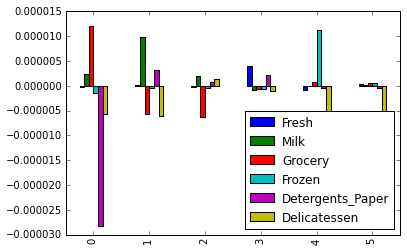

In [7]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
#import pandas as pd

data_mean = data.mean(axis=0)
data_centered = data - data_mean

ica = FastICA(n_components=6, random_state=12) # added random_state after answering question 4 (causing mismatch)
ica.fit_transform(data_centered)

# Print the independent components
print "Independent Components:"
print ica.components_
print '\n'

print 'Generated the bar graph below after Udacity review.'
print 'This makes evident the anti-correlation between Grocery and Detergents_Paper in the first vector...'
print pd.DataFrame(ica.components_, columns = data.columns).plot(kind = 'bar')

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

Choose a Cluster Type

5) What are the advantages of using K Means clustering or Gaussian Mixture Models?

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [8]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [9]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data_centered)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [10]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

#GMM - testing/comparing
clusters_GMM_components_1 = GMM(n_components=1).fit(reduced_data)
clusters_GMM_components_2 = GMM(n_components=2).fit(reduced_data)
clusters_GMM_components_3 = GMM(n_components=3).fit(reduced_data)
clusters_GMM_components_4 = GMM(n_components=4).fit(reduced_data)
# The chosen one...
clusters = GMM(n_components=2).fit(reduced_data)

#KMeans - testing/comparing
clusters_kmeans_1 = KMeans(n_clusters=1).fit(reduced_data)
clusters_kmeans_2 = KMeans(n_clusters=2).fit(reduced_data)
clusters_kmeans_3 = KMeans(n_clusters=3).fit(reduced_data)
clusters_kmeans_4 = KMeans(n_clusters=4).fit(reduced_data)

# The chosen cluster -> GMM 2...
print 'The chosen cluster variable -> GMM 2...'
print clusters

The chosen cluster variable -> GMM 2...
GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


In [11]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [12]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

# GMM - testing/comparing...
centroids_GMM_components_1 = clusters_GMM_components_1.means_
centroids_GMM_components_2 = clusters_GMM_components_2.means_
centroids_GMM_components_3 = clusters_GMM_components_3.means_
centroids_GMM_components_4 = clusters_GMM_components_4.means_
centroids = clusters.means_

# KMeans - testing/comparing...
centroids_KMeans_clusters_1 = clusters_kmeans_1.cluster_centers_
centroids_KMeans_clusters_2 = clusters_kmeans_2.cluster_centers_
centroids_KMeans_clusters_3 = clusters_kmeans_3.cluster_centers_
centroids_KMeans_clusters_4 = clusters_kmeans_4.cluster_centers_
#centroids = clusters.cluster_centers_

# The chosen centroid variable -> GMM 2...
print 'The chosen centroid variable -> GMM 2...'
print centroids

The chosen centroid variable -> GMM 2...
[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]]


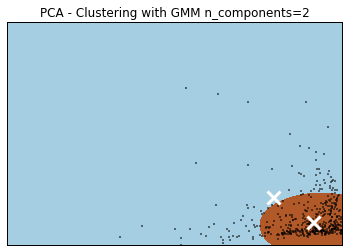

centroids_GMM_components_2...
[[-10810.23008886   9858.15532401]
 [  3308.39301792  -3017.01739698]]




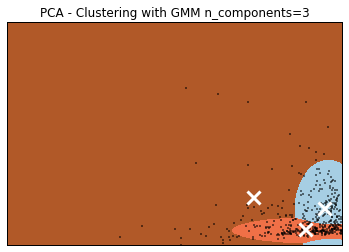

centroids_GMM_components_3
[[  7008.79023695   4324.06822955]
 [   358.36708419  -6497.47492087]
 [-17849.1311478    9968.58292565]]




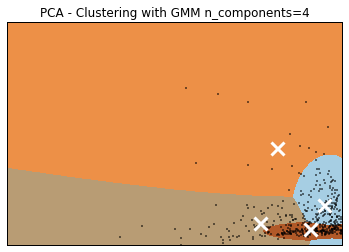

centroids_GMM_components_4
[[  7182.42527042   5428.27138593]
 [-15313.48033345  -3338.2980532 ]
 [ -9418.46902103  34454.41705257]
 [  2336.74338421  -6721.26945836]]




In [13]:
### testing GMM with various n_components ###

# test  GMM with n_components = 2
clusters = clusters_GMM_components_2
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = centroids_GMM_components_2

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('PCA - Clustering with GMM n_components=2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print 'centroids_GMM_components_2...'
print centroids_GMM_components_2
print '\n'

# test GMM with n_components = 3
clusters = clusters_GMM_components_3
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = centroids_GMM_components_3

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('PCA - Clustering with GMM n_components=3')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print 'centroids_GMM_components_3'
print centroids_GMM_components_3
print '\n'

# test  GMM with n_components = 4
clusters = clusters_GMM_components_4
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = centroids_GMM_components_4

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('PCA - Clustering with GMM n_components=4')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print 'centroids_GMM_components_4'
print centroids_GMM_components_4
print '\n'

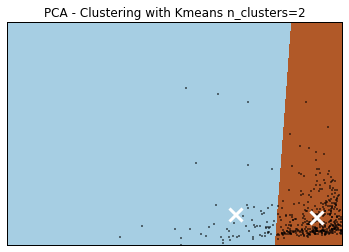

centroids_Kmeans_clusters_2...
[[-24088.33276689   1218.17938291]
 [  4175.31101293   -211.15109304]]




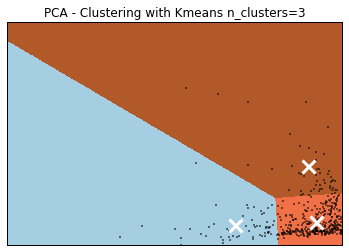

centroids_Kmeans_clusters_3...
[[-23978.86566553  -4445.56611772]
 [  4165.1217824   -3105.15811456]
 [  1341.31124554  25261.39189714]]




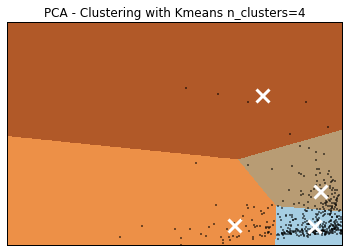

centroids_Kmeans_clusters_4...
[[  3542.08605212  -4936.7212132 ]
 [  5710.98964991  12661.45687292]
 [-24220.71188261  -4364.45560022]
 [-14537.71774395  61715.67085248]]




In [14]:
### testing K-means with various n_clusters ###

# test K-means with n_clusters = 2
clusters = clusters_kmeans_2
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = centroids_KMeans_clusters_2

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('PCA - Clustering with Kmeans n_clusters=2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print 'centroids_Kmeans_clusters_2...'
print centroids_KMeans_clusters_2
print '\n'

# test K-means with n_clusters = 3
clusters = clusters_kmeans_3
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = centroids_KMeans_clusters_3

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('PCA - Clustering with Kmeans n_clusters=3')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print 'centroids_Kmeans_clusters_3...'
print centroids_KMeans_clusters_3
print '\n'

# test  K-means with n_clusters = 4
clusters = clusters_kmeans_4
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = centroids_KMeans_clusters_4

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('PCA - Clustering with Kmeans n_clusters=4')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print 'centroids_Kmeans_clusters_4...'
print centroids_KMeans_clusters_4
print '\n'

The chosen centroid variable -> GMM 2...
[[-10810.23008886   9858.15532401]
 [  3308.39301792  -3017.01739698]]


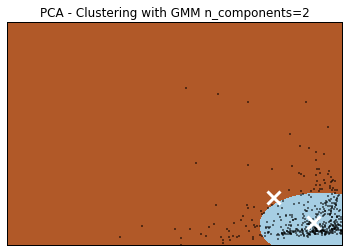

The above graph seems to represent data and the two different types of customers the most appropriately.


In [15]:
# The chosen centroid variable -> GMM 2...
#centroids = clusters.means_
centroids = centroids_GMM_components_2
print 'The chosen centroid variable -> GMM 2...'
print centroids

# The chosen one...
clusters = GMM(n_components=2).fit(reduced_data)
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
centroids = clusters.means_

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('PCA - Clustering with GMM n_components=2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print 'The above graph seems to represent data and the two different types of customers the most appropriately.'


Chosen centroids...
[[  3308.39301792  -3017.01739698]
 [-10810.23008886   9858.15532401]]


PCA.inverse_transform() to bring centroids into original dimensions
reduced_fit.inverse_transform(centroids)...
[[  9103.25397456   3839.15728914   5440.84670074   2624.33876372
    1802.56155363   1127.34432737]
 [ 21466.4371414   12191.15139458  16154.15158614   4534.44968674
    6406.92050793   2823.79379221]]


Visual...
Axes(0.125,0.125;0.775x0.775)


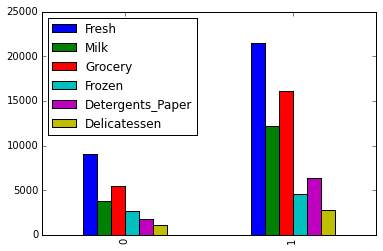

In [16]:
# PCA.inverse_transform() to bring centroids into original dimensions...

reduced_fit = PCA(n_components=2).fit(data)
reduced_data = reduced_fit.transform(data)
print 'Chosen centroids...'
print centroids
print '\n'
print 'PCA.inverse_transform() to bring centroids into original dimensions'
print 'reduced_fit.inverse_transform(centroids)...'
print reduced_fit.inverse_transform(centroids)
print '\n'

print 'Visual...'
print pd.DataFrame(reduced_fit.inverse_transform(centroids),columns=data.columns).plot(kind='bar')


**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

The central objects represent the average customer in each of the clusters.  Given the initial information about the types of clients in the assignment briefing, the first cluster represents the high-volume customers and the second cluster represents the smaller family-run shops.  The tighter cluster located at the bottom right corner of the graph represents the smaller family-run shops.  The "higher-variation" cluster that occupies the rest of the graph represents the high-volume customers.

Using the bar plot above, the high-volume customers buy a lot more "Fresh" products than the smaller-run family shops.  Overall, "Fresh", "Milk", and "Grocery" products visibly show the greatest difference between high-volume and smaller family-run shops. The other three products, "Frozen", Detergents_paper, and "Delicatessen", are ordered in larger volumes by the high-volume customers but the difference is not as great.   

Answer: 

I feel that PCA coupled with GMM gave the most insight into the data.

First, the PCA algorithm was able to create latent features and, in turn, we were able to reduce the amount of data into two principal components with minimal data loss.  Reducing the data to two principal components enabled better visualization.  

side note:  PCA enables better visualization but not better clustering.  Similar clusters would be generated with the original data.  And with the original data, the less prevalent features that are not part of the first two PCA's would also be taken into account.

Because the data didn't seem to have a clear divide between to the known types of customers, GMM was a better technique than k-means. Clustering the data between 2 groups with GMM helped visualize and relate the data back to the two main customer groups (high-volume and smaller family-run shops).


**9)** How would you use that technique to help the company design new experiments?

Answer: 

        **********************************************************************
        *                              |  High-Volume   |  Small Family-run  *
        *                              |  Customers     |  Businesses        *
        *------------------------------------------------------------------- *
        * Morning Delivery (Variant A) |     [Data]     |      [Data]        * <- Control groups
        *------------------------------------------------------------------- *
        * Evening Delivery (Variant B) |     [Data]     |      [Data]        * <- Experiment groups 
        **********************************************************************
        
        note:  only one variable can be tested at a time (to prevent bias in the experiment)
        
Now that we have the data seperated into two defined customer segments, new experiments can be implemented within a subset of customers within each of the segments for validation.  For example, in the above graph, the control groups continue to receive morning deliveries while a subset of each customer segment will receive evening deliveries.  If the change shows promise, for one or both customers, the change can then be implemented.  Given the initial information about the types of clients, high-volume customers and smaller family run shops, I would predict that this exercise would result in no significant decline in satisfaction for high-volume customers yet a signicant decline in satisfaction from the smaller family-run shops.


**10)** How would you use that data to help you predict future customer needs?

Answer: 

With customer segments defined, there is now the ability to apply supervised learning techniques to better understand the behaviours and financial results between the customer segments.  For example, the data can be used drive strategic decisions to focus on one of the customer segments over the other.  Overall, the data can assist in strategic decision-making with the support of calculated predictions.  Coupled with the A/B test technique, the calculated decisions can be validated for implementation.

With customer segments defined, supervised learning techniques, such as classification and regression, can be applied.  Classification learning algorithms can be used to relate a new customer, and their corresponding consumption elements, to one of the clusters that was generated from the unsupervised learning technique. For regression, the clusters can be used to predict purchase orders of future wholesale customers.

